In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns

In [3]:
#Extract only planets with the Super Earth and Terresterial Classification as those are the ones that could harbor life

In [1]:
# Step 1: Read the original dataset
original_dataset = pd.read_csv('C:/Users/Dylan/exoplanets/data/exoplanets_full.csv', header = 0)

# Step 2: Define the two specific labels to filter
label1 = 'Terrestrial'
label2 = 'Super Earth'

# Step 3: Filter rows with the two specific labels using logical OR (|)
filtered_rows = original_dataset[(original_dataset['pl_class'] == label1) | (original_dataset['pl_class'] == label2)]

# Step 4: Save the filtered rows to a new dataset CSV
filtered_rows.to_csv('C:/Users/Dylan/exoplanets/data/exoplanets.csv', index=False)

In [78]:
data = pd.read_csv('C:/Users/Dylan/habitability/exoplanets.csv', header = 0)

In [79]:
data.shape #checking to see if it was successful

(1862, 31)

In [80]:
data.isnull().sum()

pl_name            0
sy_snum            0
sy_pnum            0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_radj            1
pl_bmasse          0
pl_bmassj          0
pl_bmassprov       0
pl_dens           19
pl_orbeccen      240
pl_insol         223
pl_eqt           194
pl_orbincl       175
pl_ratdor        153
pl_ratror        135
st_spectype     1472
st_teff           21
st_rad            25
st_mass            0
st_met            68
st_lum            21
st_logg           24
st_age           358
st_dens           35
sy_dist            7
sy_vmag           20
sy_kmag           20
sy_gaiamag        41
pl_class           0
dtype: int64

In [81]:
data = data.drop(['sy_snum','sy_pnum','pl_radj','pl_bmassj','pl_bmassprov'], axis=1)

In [82]:
data.isnull().sum()

pl_name           0
pl_orbper         0
pl_orbsmax        0
pl_rade           0
pl_bmasse         0
pl_dens          19
pl_orbeccen     240
pl_insol        223
pl_eqt          194
pl_orbincl      175
pl_ratdor       153
pl_ratror       135
st_spectype    1472
st_teff          21
st_rad           25
st_mass           0
st_met           68
st_lum           21
st_logg          24
st_age          358
st_dens          35
sy_dist           7
sy_vmag          20
sy_kmag          20
sy_gaiamag       41
pl_class          0
dtype: int64

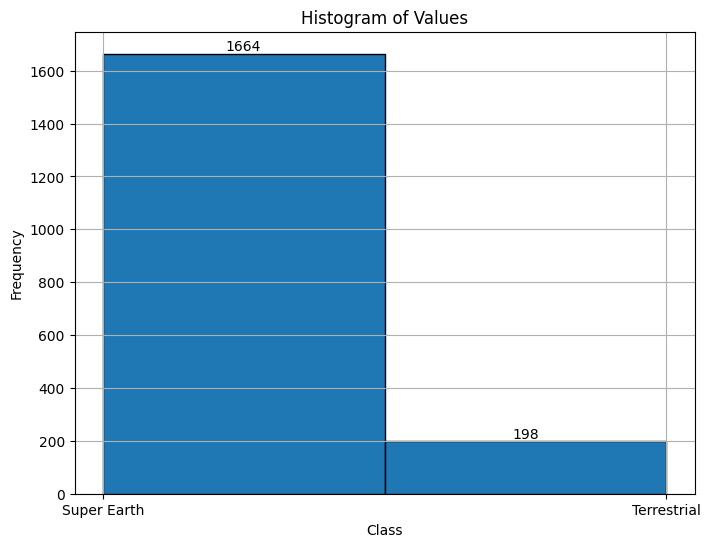

In [83]:
plt.figure(figsize=(8, 6))
hist_values, bins, _ = plt.hist(data['pl_class'], bins=2, edgecolor='black')  # Get the histogram data

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid()

# Add count labels above each bar
for i in range(len(hist_values)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist_values[i], f'{int(hist_values[i])}', ha='center', va='bottom')

plt.show()

In [84]:
def luminosity(st_rad, st_teff):
    luminosity = ((st_rad)**2) *((st_teff/5778) ** 4)
    return luminosity

In [85]:
st_luminosity = luminosity(0.94, 5172)
print(st_luminosity)

0.567256684143693


In [86]:
data['st_luminosity'] = data.apply(lambda row: luminosity(row['st_rad'], row['st_teff']), axis=1)

In [87]:
data

,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,...,st_lum,st_logg,st_age,st_dens,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,pl_class,st_luminosity
0,55 Cnc e,0.736547,0.015440,1.875,7.99000,6.660,0.050,2657.83,1958.0,83.59,...,-0.197,4.43,10.20,1.41000,12.58550,5.95084,4.015,5.72973,Super Earth,0.567257
1,CD Cet b,2.290700,0.018500,1.820,3.95000,3.600,NaN,8.60,464.0,87.48,...,-2.533,4.93,3.00,30.35878,8.60715,13.95000,7.833,12.12320,Super Earth,0.002489
2,CoRoT-7 b,0.853592,0.017016,1.681,4.07661,9.355,0.000,NaN,1756.0,80.10,...,-0.289,4.50,1.80,2.00000,159.90600,11.72800,9.806,11.52390,Super Earth,0.478559
3,DMPP-1 d,2.882000,0.042200,1.650,3.35000,4.100,0.070,NaN,1632.0,NaN,...,0.320,4.41,2.01,0.81281,62.53880,7.98000,6.690,7.85032,Super Earth,2.099310
4,DMPP-1 e,5.516000,0.065100,1.860,4.13000,3.530,0.070,NaN,1314.0,NaN,...,0.320,4.41,2.01,0.81281,62.53880,7.98000,6.690,7.85032,Super Earth,2.099310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,rho CrB e,12.949000,0.106100,1.770,3.79000,3.760,0.126,NaN,NaN,NaN,...,0.260,4.25,10.20,0.64638,17.46710,5.40816,3.857,5.24167,Super Earth,1.872206
1858,tau Cet e,162.870000,0.538000,1.810,3.93000,3.640,0.180,NaN,NaN,NaN,...,-0.305,4.52,12.12,2.24358,3.60304,3.49607,1.794,3.24854,Super Earth,0.491388
1859,tau Cet f,636.130000,1.334000,1.810,3.93000,3.640,0.160,NaN,NaN,NaN,...,-0.305,4.52,12.12,2.24358,3.60304,3.49607,1.794,3.24854,Super Earth,0.491388
1860,tau Cet g,20.000000,0.133000,1.180,1.75000,5.850,0.060,NaN,NaN,NaN,...,-0.305,4.52,12.12,2.24358,3.60304,3.49607,1.794,3.24854,Super Earth,0.491388


In [88]:
insol_column = 'pl_insol'
luminosity_column = 'st_luminosity'
orbsmax_column = 'pl_orbsmax'

# Flux calculation function
def flux(star_luminosity, st_orbsmax):
    return star_luminosity / (st_orbsmax ** 2)

# Iterate through the pl_insol column and perform calculations
for index, value in data['pl_insol'].items():
    if pd.isnull(value):
        star_luminosity = data.at[index, luminosity_column]
        st_orbsmax = data.at[index, orbsmax_column]
        calculated_flux = flux(star_luminosity, st_orbsmax)
        data.at[index, insol_column] = calculated_flux

print(data)

        pl_name   pl_orbper  pl_orbsmax  pl_rade  pl_bmasse  pl_dens  \
0      55 Cnc e    0.736547    0.015440    1.875    7.99000    6.660   
1      CD Cet b    2.290700    0.018500    1.820    3.95000    3.600   
2     CoRoT-7 b    0.853592    0.017016    1.681    4.07661    9.355   
3      DMPP-1 d    2.882000    0.042200    1.650    3.35000    4.100   
4      DMPP-1 e    5.516000    0.065100    1.860    4.13000    3.530   
...         ...         ...         ...      ...        ...      ...   
1857  rho CrB e   12.949000    0.106100    1.770    3.79000    3.760   
1858  tau Cet e  162.870000    0.538000    1.810    3.93000    3.640   
1859  tau Cet f  636.130000    1.334000    1.810    3.93000    3.640   
1860  tau Cet g   20.000000    0.133000    1.180    1.75000    5.850   
1861  tau Cet h   49.410000    0.243000    1.190    1.83000    5.970   

      pl_orbeccen     pl_insol  pl_eqt  pl_orbincl  ...  st_lum  st_logg  \
0           0.050  2657.830000  1958.0       83.59  ...  -0

In [89]:
data.isnull().sum()

pl_name             0
pl_orbper           0
pl_orbsmax          0
pl_rade             0
pl_bmasse           0
pl_dens            19
pl_orbeccen       240
pl_insol           25
pl_eqt            194
pl_orbincl        175
pl_ratdor         153
pl_ratror         135
st_spectype      1472
st_teff            21
st_rad             25
st_mass             0
st_met             68
st_lum             21
st_logg            24
st_age            358
st_dens            35
sy_dist             7
sy_vmag            20
sy_kmag            20
sy_gaiamag         41
pl_class            0
st_luminosity      25
dtype: int64

In [90]:
def esi_simple(stellar_flux, radius):
    part1 = (((stellar_flux -1)/(stellar_flux + 1)) ** 2)
    part2 = (((radius - 1)/(radius + 1))**2)
    part3 = 0.5 * (part1 + part2)
    ESI = 1 - math.sqrt(part3)
    return ESI

In [91]:
ESI = esi_simple(1.15, 1.02)
print(ESI)

0.950172670407225


In [92]:
selected_columns = ['pl_name', 'pl_orbsmax', 'pl_bmasse', 'pl_rade', 'pl_insol', "st_luminosity", 'pl_eqt', "pl_class", "st_spectype", "st_age"]
df = data[selected_columns].copy()

In [93]:
df.isnull().sum()

pl_name             0
pl_orbsmax          0
pl_bmasse           0
pl_rade             0
pl_insol           25
st_luminosity      25
pl_eqt            194
pl_class            0
st_spectype      1472
st_age            358
dtype: int64

In [94]:
columns_to_check = ['pl_rade', 'pl_insol']  # Specify the columns you want to consider
df.dropna(subset=columns_to_check, inplace=True)

In [95]:
df.isnull().sum()

pl_name             0
pl_orbsmax          0
pl_bmasse           0
pl_rade             0
pl_insol            0
st_luminosity       0
pl_eqt            169
pl_class            0
st_spectype      1452
st_age            340
dtype: int64

In [96]:
df['ESI'] = df.apply(lambda row: esi_simple(row['pl_insol'], row['pl_rade']), axis=1)

In [97]:
df

,pl_name,pl_orbsmax,pl_bmasse,pl_rade,pl_insol,st_luminosity,pl_eqt,pl_class,st_spectype,st_age,ESI
0,55 Cnc e,0.015440,7.99000,1.875,2657.830000,0.567257,1958.0,Super Earth,G8 V,10.20,0.261378
1,CD Cet b,0.018500,3.95000,1.820,8.600000,0.002489,464.0,Super Earth,M5.0 V,3.00,0.403641
2,CoRoT-7 b,0.017016,4.07661,1.681,1652.802408,0.478559,1756.0,Super Earth,G9 V,1.80,0.271267
3,DMPP-1 d,0.042200,3.35000,1.650,1178.831344,2.099310,1632.0,Super Earth,F8 V,2.01,0.273097
4,DMPP-1 e,0.065100,4.13000,1.860,495.352774,2.099310,1314.0,Super Earth,F8 V,2.01,0.264345
...,...,...,...,...,...,...,...,...,...,...,...
1857,rho CrB e,0.106100,3.79000,1.770,166.311727,1.872206,NaN,Super Earth,G0 V,10.20,0.274222
1858,tau Cet e,0.538000,3.93000,1.810,1.697695,0.491388,NaN,Super Earth,G8.5V,12.12,0.726158
1859,tau Cet f,1.334000,3.93000,1.810,0.276129,0.491388,NaN,Super Earth,G8.5V,12.12,0.550082
1860,tau Cet g,0.133000,1.75000,1.180,27.779271,0.491388,NaN,Super Earth,G8.5V,12.12,0.339448


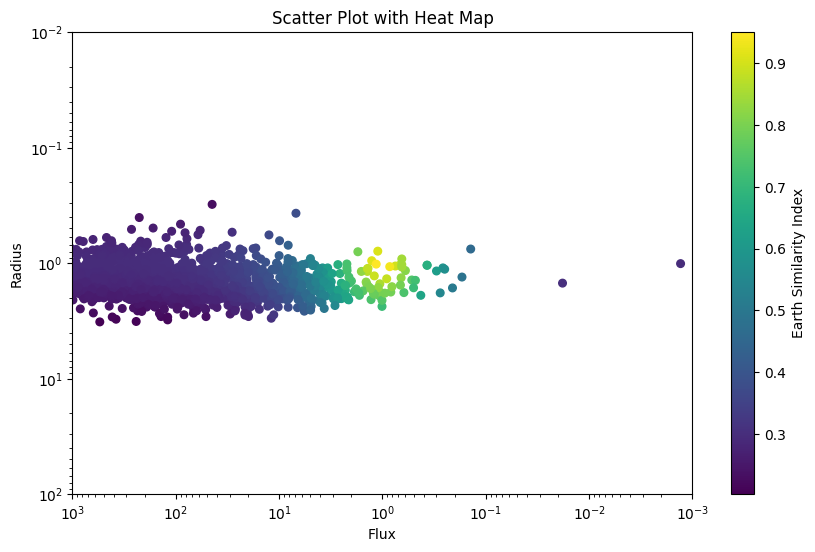

In [98]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["pl_insol"], df["pl_rade"], c=df["ESI"], cmap='viridis', s=30)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Earth Similarity Index')

# Set labels and title
plt.xlabel('Flux')
plt.ylabel('Radius')
plt.xlim(1000, 0.001)  # Adjust x-axis range
plt.ylim(100, 0.01)    # Adjust y-axis range
plt.xscale('log')      # Use logarithmic scale for x-axis
plt.yscale('log')      # Use logarithmic scale for y-axis
plt.title('Scatter Plot with Heat Map')

# Show the plot
plt.show()

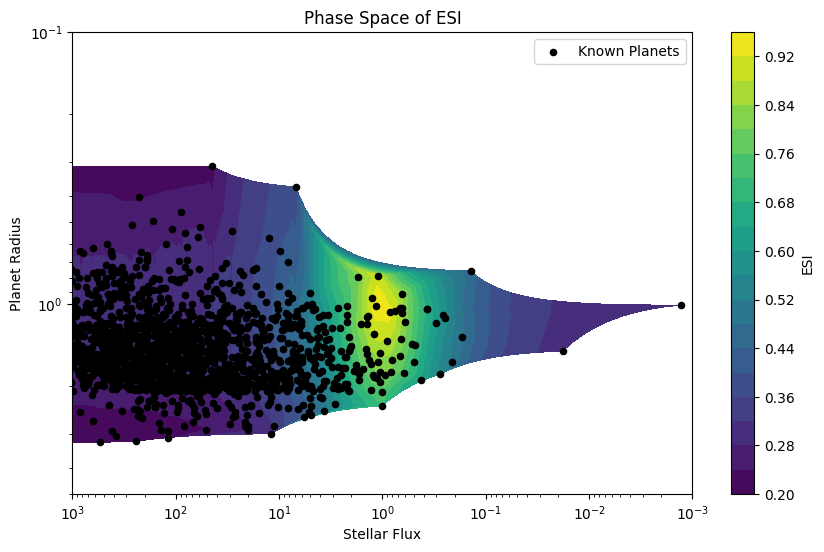

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

num_points = 1837
pl_insol_grid = np.logspace(np.log10(df["pl_insol"].min()), np.log10(df["pl_insol"].max()), num_points)
pl_rade_grid = np.linspace(df["pl_rade"].min(), df["pl_rade"].max(), num_points)
XI, YI = np.meshgrid(pl_insol_grid, pl_rade_grid)

points = np.array([df["pl_insol"], df["pl_rade"]]).T
values = df["ESI"]
ZI = griddata(points, values, (XI, YI), method='linear')

plt.figure(figsize=(10, 6))

phase_space = plt.contourf(XI, YI, ZI, levels=20, cmap='viridis')

cbar = plt.colorbar(phase_space)
cbar.set_label('ESI')

plt.xlabel('Stellar Flux')
plt.ylabel('Planet Radius')
plt.xscale('log')  
plt.xlim(1000, 0.001)  
plt.ylim(5, 0.1) 
plt.yscale('log')
plt.title('Phase Space of ESI')


known_planets_stellar_flux = df['pl_insol'] 
known_planets_radius = df['pl_rade']        
plt.scatter(known_planets_stellar_flux, known_planets_radius, color='black', s=20, label='Known Planets')
plt.legend()
plt.show()


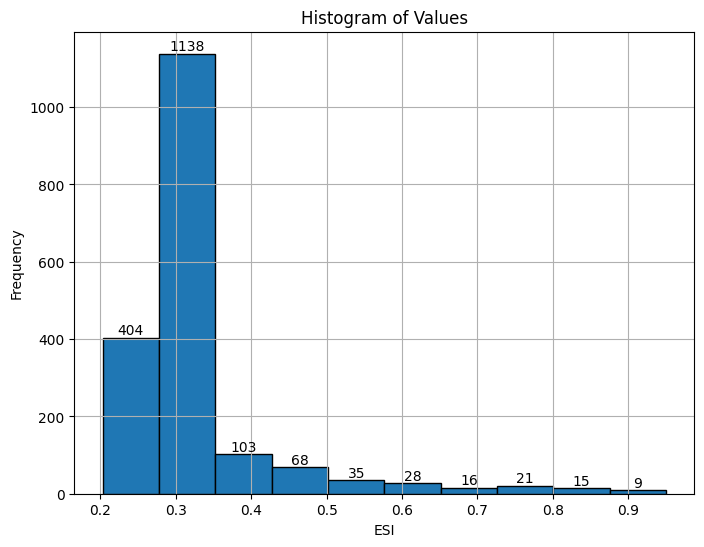

In [100]:
plt.figure(figsize=(8, 6))
hist_values, bins, _ = plt.hist(df['ESI'], bins=10, edgecolor='black')  # Get the histogram data

plt.xlabel('ESI')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid()

# Add count labels above each bar
for i in range(len(hist_values)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist_values[i], f'{int(hist_values[i])}', ha='center', va='bottom')

plt.show()

In [101]:
filtered_data = df[df['ESI'] > 0.7]

# Print the filtered data points
filtered_data

,pl_name,pl_orbsmax,pl_bmasse,pl_rade,pl_insol,st_luminosity,pl_eqt,pl_class,st_spectype,st_age,ESI
7,EPIC 201238110 b,0.134600,4.160,1.870,1.122351,0.020334,NaN,Super Earth,M,NaN,0.781809
38,GJ 1002 b,0.045700,1.080,1.030,0.670000,0.001471,231.0,Super Earth,M5.5 V,NaN,0.859882
41,GJ 1061 c,0.035000,1.740,1.180,1.400000,0.001747,NaN,Super Earth,M5.5 V,7.00,0.868479
42,GJ 1061 d,0.054000,1.640,1.160,0.600000,0.001747,NaN,Super Earth,M5.5 V,7.00,0.815627
44,GJ 1132 c,0.047600,2.640,1.430,1.996667,0.004524,300.0,Super Earth,M4.5 V,5.00,0.733607
49,GJ 273 b,0.091101,2.890,1.510,1.060000,0.009871,NaN,Super Earth,M3.5,NaN,0.854856
66,GJ 625 b,0.078361,2.820,1.490,2.104695,0.012924,NaN,Super Earth,M2,NaN,0.712486
72,GJ 682 b,0.080000,4.400,1.930,1.060659,0.006788,NaN,Super Earth,M3.5 V,NaN,0.774597
153,K2-133 e,0.134600,3.640,1.730,1.800000,0.033881,296.0,Super Earth,M1.5 V,NaN,0.723292
175,K2-155 d,0.193700,4.270,1.900,1.670000,0.099213,381.0,Super Earth,K7,NaN,0.717792


In [104]:
filtered_data.to_csv('C:/Users/Dylan/habitability/updated_habitable.csv', index=False)

In [108]:
filtered = pd.read_csv('C:/Users/Dylan/habitability/updated_habitable.csv', header = 0)

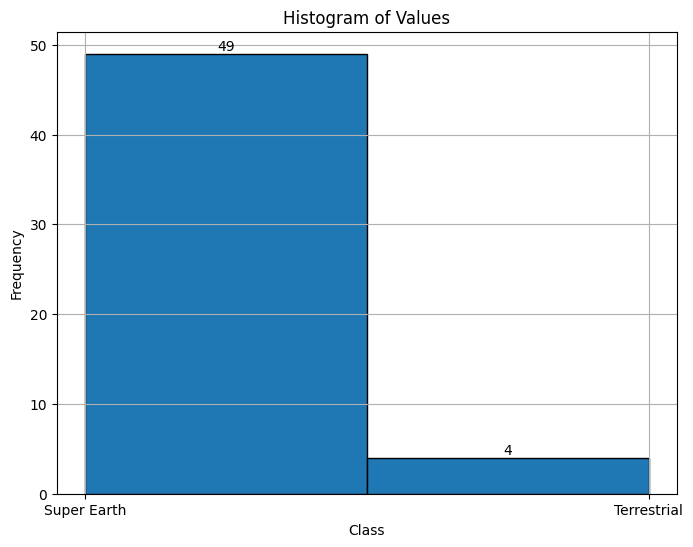

In [109]:
plt.figure(figsize=(8, 6))
hist_values, bins, _ = plt.hist(filtered['pl_class'], bins=2, edgecolor='black')  # Get the histogram data

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid()

# Add count labels above each bar
for i in range(len(hist_values)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, hist_values[i], f'{int(hist_values[i])}', ha='center', va='bottom')

plt.show()

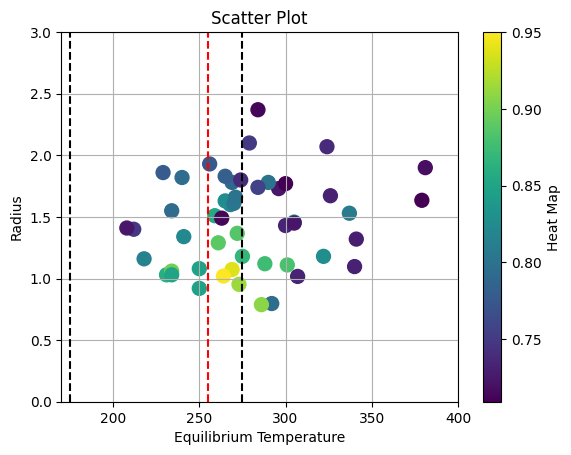

In [110]:
#plt.scatter(filtered['pl_eqt'], filtered['ESI'], color='blue', marker='o')
scatter = plt.scatter(filtered["pl_eqt"], filtered["pl_rade"], c=filtered["ESI"], cmap='viridis', s=100)
cbar = plt.colorbar(scatter)
cbar.set_label('Heat Map')
plt.axvline(x=255, color='red', linestyle='--', label='Vertical Line')
plt.axvline(x=175, color='black', linestyle='--', label='Vertical Line')
plt.axvline(x=275, color='black', linestyle='--', label='Vertical Line')
plt.xlim(170, 400)  
plt.ylim(0, 3) 
plt.title('Scatter Plot')
plt.xlabel('Equilibrium Temperature')
plt.ylabel('Radius')
plt.grid(True)
plt.show()

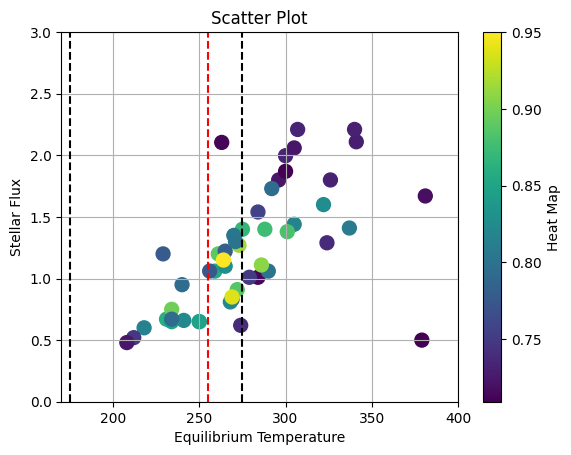

In [111]:
#plt.scatter(filtered['pl_eqt'], filtered['ESI'], color='blue', marker='o')
scatter = plt.scatter(filtered["pl_eqt"], filtered["pl_insol"], c=filtered["ESI"], cmap='viridis', s=100)
cbar = plt.colorbar(scatter)
cbar.set_label('Heat Map')
plt.axvline(x=255, color='red', linestyle='--', label='Vertical Line')
plt.axvline(x=175, color='black', linestyle='--', label='Vertical Line')
plt.axvline(x=275, color='black', linestyle='--', label='Vertical Line')
plt.xlim(170, 400)  
plt.ylim(0, 3) 
plt.title('Scatter Plot')
plt.xlabel('Equilibrium Temperature')
plt.ylabel('Stellar Flux')
plt.grid(True)
plt.show()

In [152]:
name = []
temperature = []
radius = []
similarity = []
mass = []
for index, row in filtered.iterrows():
    if row['pl_eqt'] == None:
        pass
    if 175 < row['pl_eqt'] <= 275:
        print(row['pl_name'])
        temperature.append(row['pl_eqt'])
        name.append(row['pl_name'])
        radius.append(row['pl_rade']) 
        similarity.append(row['ESI'])
        mass.append(row['pl_bmasse'])

GJ 1002 b
GJ 1061 c
GJ 1061 d
GJ 273 b
GJ 625 b
GJ 682 b
K2-72 e
Kepler-1229 b
Kepler-1544 b
Kepler-1649 c
Kepler-1652 b
Kepler-283 c
Kepler-296 f
Kepler-440 b
Kepler-442 b
Kepler-452 b
Kepler-62 e
Kepler-62 f
LP 890-9 c
Proxima Cen b
Ross 508 b
TOI-700 d
TOI-700 e
TOI-715 b
TRAPPIST-1 e
Teegarden's Star b
Wolf 1061 c
Wolf 1069 b


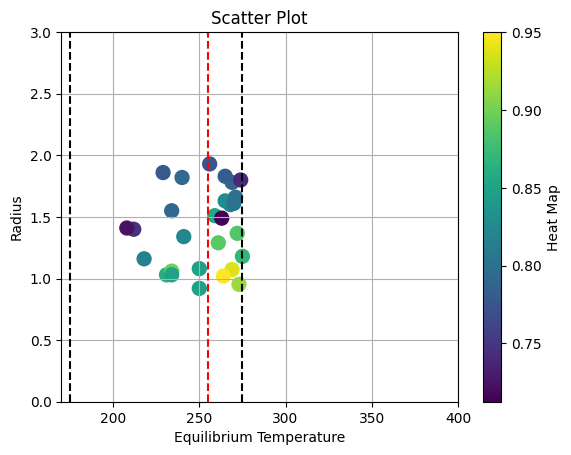

In [175]:
scatter = plt.scatter(temperature, radius, c=similarity, cmap='viridis', s=100)
cbar = plt.colorbar(scatter)
cbar.set_label('Heat Map')
plt.axvline(x=255, color='red', linestyle='--', label='Vertical Line')
plt.axvline(x=175, color='black', linestyle='--', label='Vertical Line')
plt.axvline(x=275, color='black', linestyle='--', label='Vertical Line')
plt.xlim(170, 400)  
plt.ylim(0, 3) 
plt.title('Scatter Plot')
plt.xlabel('Equilibrium Temperature')
plt.ylabel('Radius')
plt.grid(True)
plt.show()

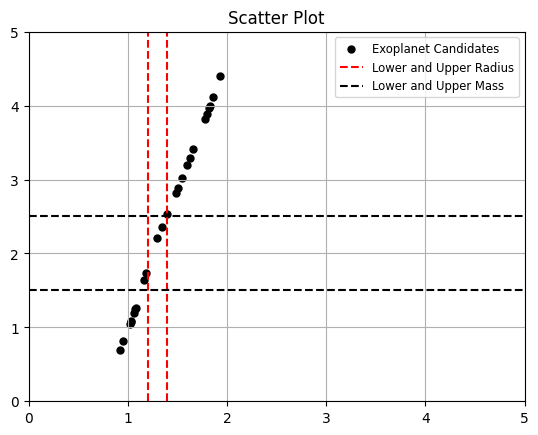

In [158]:
plt.scatter(radius, mass, color='black', label='Exoplanet Candidates', s = 25)
plt.axvline(x=1.2, color='red', linestyle='--', label='Lower and Upper Radius')
plt.axvline(x=1.4, color='red', linestyle='--')
plt.axhline(y=1.5, color='black', linestyle='--', label='Lower and Upper Mass')
plt.axhline(y=2.5, color='black', linestyle='--')
plt.xlim(0, 5)  
plt.ylim(0, 5) 
plt.title('Scatter Plot')
plt.legend(loc='upper right', fontsize='small')  # Provide labels directly
plt.grid(True)
plt.xlabel('Radius (Earths)')
plt.ylabel('Mass (Earths)')
plt.show()

In [181]:
new = []
for index, row in filtered.iterrows():
    if row['pl_name'] in name and 1.5 <= row['pl_bmasse'] < 3.0 and 1.1 <= row['pl_rade'] < 1.4:
        print(row['pl_name'])
        new.append(row['pl_name'])

GJ 1061 c
GJ 1061 d
K2-72 e
Kepler-442 b


In [185]:
neww = []
for index, row in filtered.iterrows():
    if row['pl_name'] in new and row['st_spectype'] == 'K' and row['st_age'] is not None:
        print(row['pl_name'])
        neww.append(row['pl_name'])

Kepler-442 b


In [168]:
for index, row in filtered.iterrows():
    if row['pl_name'] in neww:
        print(row)
        break

pl_name          Kepler-442 b
pl_orbsmax              0.409
pl_bmasse                2.36
pl_rade                  1.34
pl_insol                 0.66
st_luminosity        0.121281
pl_eqt                  241.0
pl_class          Super Earth
st_spectype                 K
st_age                    2.9
ESI                  0.822429
Name: 32, dtype: object


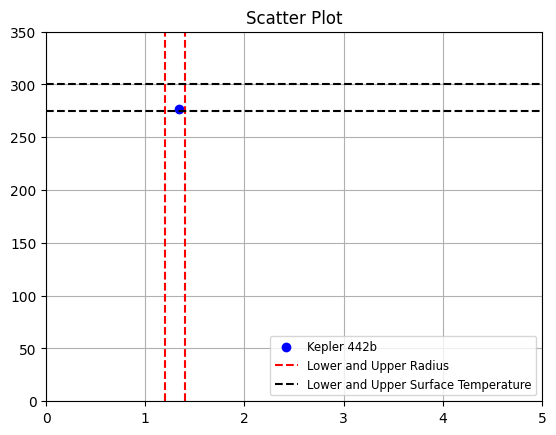

In [174]:
plt.scatter(1.34, 277, color='blue', label='Kepler 442b')
plt.axvline(x=1.2, color='red', linestyle='--', label='Lower and Upper Radius')
plt.axvline(x=1.4, color='red', linestyle='--')
plt.axhline(y=275, color='black', linestyle='--', label='Lower and Upper Surface Temperature')
plt.axhline(y=300, color='black', linestyle='--')
plt.xlim(0, 5)  
plt.ylim(0, 350) 
plt.title('Scatter Plot')
plt.legend(loc='lower right', fontsize='small')  # Provide labels directly
plt.grid(True)
plt.show()

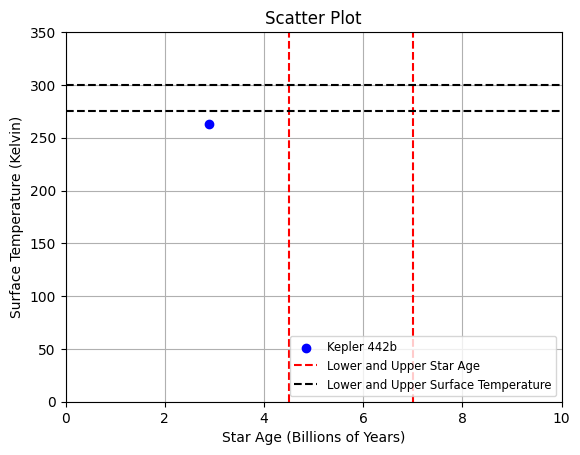

In [179]:
plt.scatter(0.822429, 0.822429, color='blue', label='Kepler 442b')
plt.axvline(x=4.5, color='red', linestyle='--', label='Lower and Upper Star Age')
plt.axvline(x=7, color='red', linestyle='--')
plt.axhline(y=275, color='black', linestyle='--', label='Lower and Upper Surface Temperature')
plt.axhline(y=300, color='black', linestyle='--')
plt.xlim(0, 10)  
plt.ylim(0, 350) 
plt.title('Scatter Plot')
plt.legend(loc='lower right', fontsize='small')  # Provide labels directly
plt.grid(True)
plt.xlabel('Star Age (Billions of Years)')
plt.ylabel('Surface Temperature (Kelvin)')
plt.show()

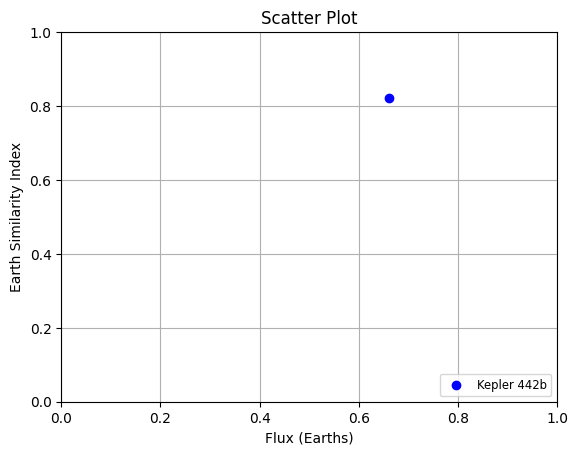

In [186]:
plt.scatter(0.66, 0.822429, color='blue', label='Kepler 442b')
plt.xlim(0, 1)  
plt.ylim(0, 1) 
plt.title('Scatter Plot')
plt.legend(loc='lower right', fontsize='small')  # Provide labels directly
plt.grid(True)
plt.xlabel('Flux (Earths)')
plt.ylabel('Earth Similarity Index')
plt.show()